# About
This notebook illustrates how to run mediation analyses in R. 
It is used as a companion for a lecture in the CS-411 course "Digital Education". 
Patrick Jermann, CEDE, EPFL

## Mediation

* explains how or why an intervention works
* mediator explains all or part of the treatment’s impact on an intended outcome
* is an intermediate outcome that is measured or observed after the onset of the intervention. E.g. fidelity of application, how many questions were asked ?

## Moderation

* explains who the intervention benefits or what conditions must exist for the intervention to be effective.
* a factor that reflects who is most affected by the treatment
* a factor that exists prior to the introduction of an intervention
Eg. student characteristics, such as special education status, gender, …

# References

Seltman, H. J. (2012). Experimental design and analysis. 

http://www.stat.cmu.edu/~hseltman/309/Book/

* t-test: chapter 6
* ANOVA: chapter 7
* Regression: chapter 10
* Chi-square: chapter 16

Jose, P. E. (2013). Doing statistical mediation and moderation. Guilford Press. 
https://books.google.ch/books?id=aJFcO81Ro-0C&printsec=copyright&redir_esc=y#v=onepage&q&f=false

* Basic Mediation: chapter 3
* Basic Moderation: chapter 5


![Overview](./images/variable-triangle.png)

# Experiment (IPS vs PSI)

In this experiment, we are studying the effect of the order of instruction and problem-solving (independent variable) on learning (dependent variable) dynamic programming.

Participants followed a moodle class (link) with a problem solving exercise and information to read. 

## Participants

The sample consisted of N=18 participants. 

## Independent variable

*Order of instruction* The independent variable has two modalities (also called conditions):

* I-PS : instruction followed by problem-solving
* PS-I : problem-solving followed by instruction

Participants were *randomly* assigned to one of the experimental conditions. 

## Dependent variable

*Learning gain*. Participants completed a 10 question *pre-test* before starting the experiment. The pre-test was a series of questions about their understanding of the sun-earth relative positions. After the experiment, particpants completed a 10 question *post-test* with similar questions as the pre-test. The learning gain was computed as :

$learning.gain = post.test - pre.test$

another possibilty would be the relative learning gain

$rel.gain = \frac{post.test - pre.test}{max - pre.test}$

## Control variables

*Age group*. Participants were recruited among different stages. We classed them according to their highest obtained diploma. High school, bachelor or Master.

*Self-regulation skills*. Participants answered a few preliminary question for us to asses their skills before the task

## Intermediate / Process variables

*Solutions*. The problem solving recorder the number of time they tested their solution, and the time when they did.


![Overview](./images/overview.png)

## Dataset

This dataset was generated to illustrate basic statistical techniques like ANOVA and regression as well lightly more advanced techniques like mediation and moderation. However, we tried as much as possible to implement variations compatible with insights found in the literature about Productive Failure:

Sinha, T., & Kapur, M. (2021). When Problem Solving Followed by Instruction Works: Evidence for Productive Failure. Review of Educational Research, 91(5), 761–798. https://doi.org/10.3102/00346543211019105


# Analysis

## Loading libraries


In [46]:
library(tidyverse) # Give ggplot, read_delim, tidyr, etc.
library(janitor) # Gives tabyl
library(gplots) # Gives plotmeans
library(ggstatsplot) # Gives pretty plotting
library(car) # Gives Anova


## Loading data


In [51]:
library(tidyverse) # Give ggplot, read_delim, tidyr, etc.

df <- read_delim(file="data.csv", delim=",") %>%
  mutate(condition = factor(condition,labels=c("IPS","PSI")),
         age.group = factor(age.group),
         studies = factor(studies))

head(df)

New names:
• `` -> `...1`
Rows: 20 Columns: 43
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): Email address, State, Time taken, age.group, studies, python, Res...
dbl  (25): ...1, Response 7, Grade/10.00_pre, Q. 1 /2.50_pre, Q. 2 /2.50_pre...
lgl   (2): recursion, complexity
time  (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Email address,State,Time taken,age.group,studies,python,recursion,complexity,Response 6,⋯,nb_tests,tot_minutes,success,timestamp,passed,fast_enough,Q6_score_y,Q7_score_y,Q8_score_y,prog_score_y
<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<lgl>,<lgl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,rayan.rami@unil.ch,Finished,3 mins 22 secs,18-24 years,High School Diploma or Equivalent,"Yes, in Python",TRUE,FALSE,{8} {True} {True},⋯,7,6.266667,0,"[3.85, 3.9333333333333336, 4.05, 4.266666666666667, 4.716666666666667, 6.083333333333333, 6.266666666666667]","[4, 4, 4, 4, 4, 0, 4]","[4, 4, 4, 4, 4, 0, 4]",0.6666667,1,0,1.666667
1,dp.moodle2023+13@gmail.com,Finished,2 mins 43 secs,18-24 years,High School Diploma or Equivalent,"Yes, in Python",TRUE,TRUE,{8} {True} {False},⋯,3,11.700000,1,"[7.216666666666667, 10.9, 11.7]","[4, 5, 5]","[4, 5, 5]",1.0000000,1,0,2.000000
2,dp.moodle2023+17@gmail.com,Finished,3 mins 39 secs,25-34 years,Bachelor's Degree,"Yes, in Python",TRUE,TRUE,{8} {4} {KeyError},⋯,0,0.000000,0,NA,NA,NA,0.3333333,1,0,1.333333
3,dp.moodle2023+18@gmail.com,Finished,10 mins 53 secs,25-34 years,Master's Degree,"Yes, in Python",TRUE,TRUE,{8} {True} {False},⋯,8,11.966667,0,"[2.033333333333333, 4.266666666666667, 4.45, 5.183333333333334, 5.8, 10.116666666666667, 11.466666666666667, 11.966666666666667]","[0, 0, 0, 0, 4, 4, 4, 4]","[5, 5, 0, 0, 4, 4, 4, 4]",1.0000000,1,1,3.000000
4,dp.moodle2023+12@gmail.com,Finished,4 mins 59 secs,18-24 years,Bachelor's Degree,"Yes, in Python",TRUE,TRUE,{8} {True} {False},⋯,1,9.216667,0,[9.216666666666667],[2],[5],1.0000000,1,1,3.000000
5,amanmarkar@yahoo.co.uk,Finished,4 mins 52 secs,18-24 years,Bachelor's Degree,"Yes, in Python",TRUE,TRUE,{8} {True} {False},⋯,4,7.683333,1,"[0.16666666666666666, 5.383333333333334, 7.616666666666667, 7.683333333333334]","[0, 5, 5, 5]","[5, 5, 5, 5]",1.0000000,1,0,2.000000


# Mediation

* explains how or why an intervention works
* mediator explains all or part of the treatment’s impact on an intended outcome
* is an intermediate outcome that is measured or observed **after** the onset of the intervention. E.g. fidelity of application, how many questions were asked ?
* there is a plausible causality relation between the experimental treatment and the mediating variable.


![Mediation](./images/mediation.png){width=90%}

# Condition affects the learning gain (c path)


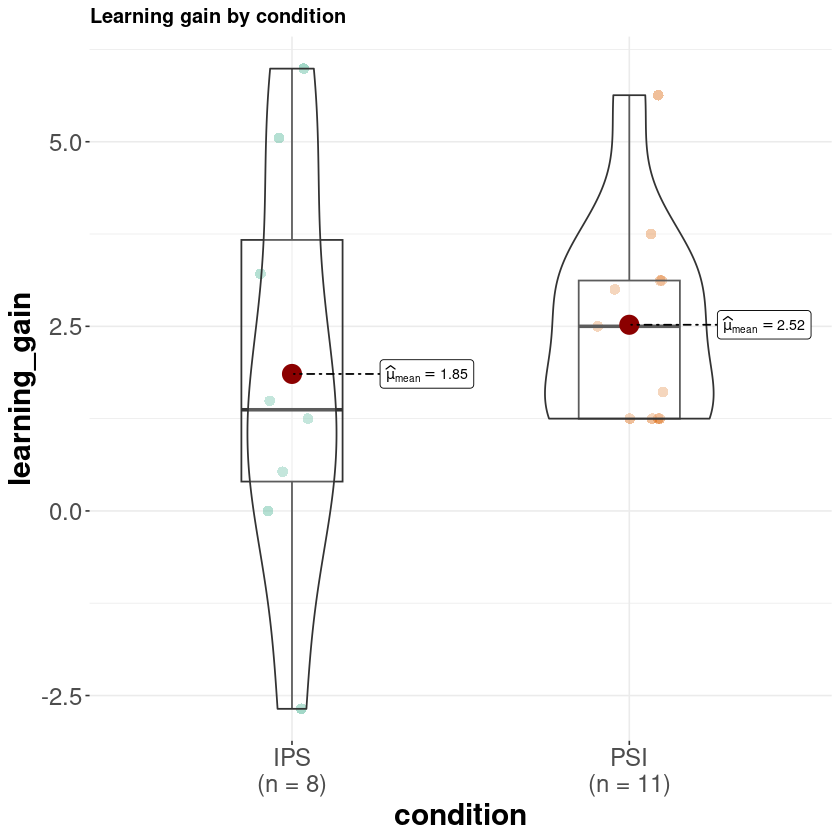

In [52]:
ggbetweenstats(data = df, 
                            x = condition, 
                            y = learning_gain,
                            pairwise.comparisons = FALSE, 
                            results.subtitle=FALSE,
                            var.equal = TRUE,
                            outlier.tagging = FALSE, 
                            plot.type = "box", 
                            title = "Learning gain by condition", 
                            ggplot.component = list(theme(text = element_text(size = 18)))) 


# Condition affects the number of solutions generated (a path)


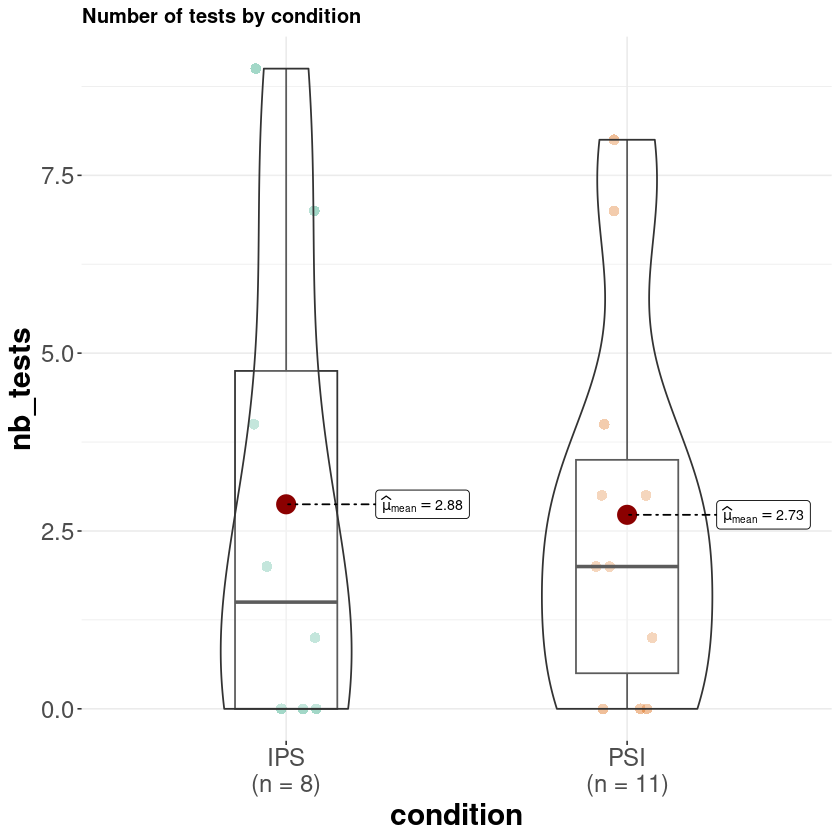

In [53]:
ggbetweenstats(data = df, 
                            x = condition, 
                            y = nb_tests,
                            pairwise.comparisons = FALSE, 
                            results.subtitle=FALSE,
                            var.equal = TRUE,
                            outlier.tagging = FALSE, 
                            plot.type = "box", 
                            title = "Number of tests by condition", 
                            ggplot.component = list(theme(text = element_text(size = 18)))) 


# Solutions and Learning gain are correlated (b path)


[1] NA

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


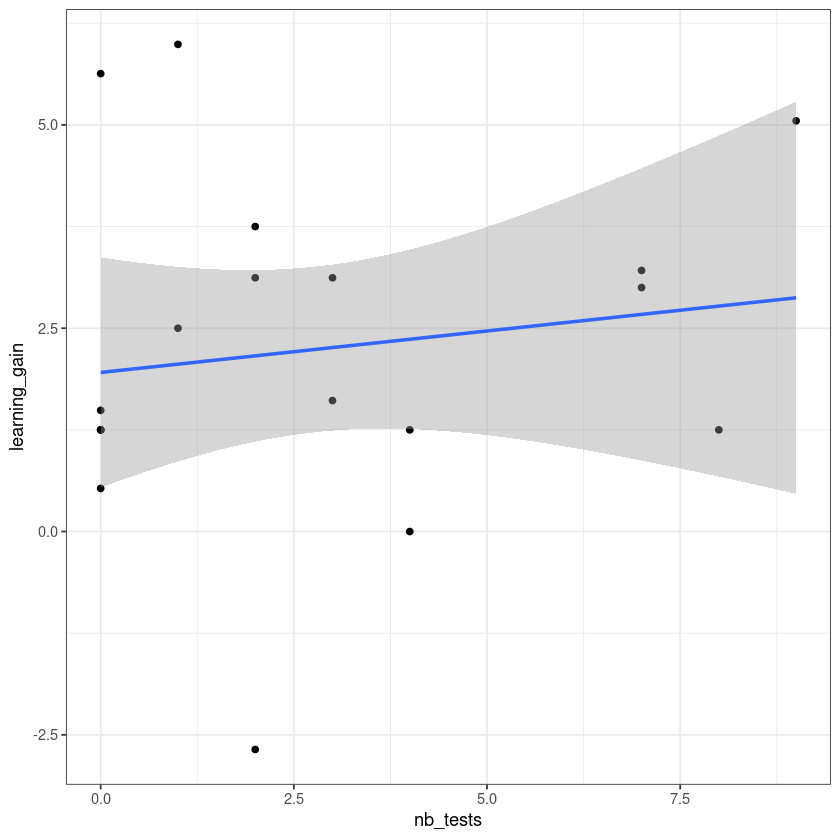

In [54]:
cor(df$learning_gain, df$nb_tests)

df %>% ggplot(aes(x=nb_tests, y=learning_gain)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_bw() 


## The "old" way
Baron and Kenny's (1986) steps for mediation analysis
See https://davidakenny.net/cm/mediate.htm

> Step 1:  Show that the causal variable is correlated with the outcome.  Use Y as the criterion variable in a regression equation and X as a predictor (estimate and test path c in the above figure). This step establishes that there is an effect that may be mediated.

> Step 2: Show that the causal variable is correlated with the mediator.  Use M as the criterion variable in the regression equation and X as a predictor (estimate and test path a).  This step essentially involves treating the mediator as if it were an outcome variable.

> Step 3:  Show that the mediator affects the outcome variable.  Use Y as the criterion variable in a regression equation and X and M as predictors (estimate and test path b).  It is not sufficient just to correlate the mediator with the outcome because the mediator and the outcome may be correlated because they are both caused by the causal variable X.  Thus, the causal variable must be controlled in establishing the effect of the mediator on the outcome.

> Step 4:  To establish that M completely mediates the X-Y relationship, the effect of X on Y controlling for M (path c') should be zero (see discussion below on significance testing).   The effects in both Steps 3 and 4 are estimated in the same equation.


# Step 1

First we make sure the experimental treatment affects the dependent variable.


In [55]:
c.path <- lm(learning_gain ~ condition, data=df)
summary(c.path)



Call:
lm(formula = learning_gain ~ condition, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5350 -1.2709 -0.3650  0.9141  4.1350 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)    1.8550     0.7417   2.501   0.0229 *
conditionPSI   0.6659     0.9748   0.683   0.5037  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.098 on 17 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.02672,	Adjusted R-squared:  -0.03054 
F-statistic: 0.4666 on 1 and 17 DF,  p-value: 0.5037


# Step 2

This model checks whether the experimental treatment affects the mediating variable 


In [56]:
a.path <- lm(nb_tests ~ condition, data=df)
summary(a.path)


Call:
lm(formula = nb_tests ~ condition, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8750 -2.7273 -0.7273  1.1989  6.1250 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)    2.8750     1.0815   2.658   0.0165 *
conditionPSI  -0.1477     1.4213  -0.104   0.9184  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.059 on 17 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0006351,	Adjusted R-squared:  -0.05815 
F-statistic: 0.0108 on 1 and 17 DF,  p-value: 0.9184


# Step 3 & 4

Finally we check whether a) the mediating variable affects the dependent variable and b) that the effect of the independent variable **decreases** (partial mediation) or even **dissapears** (full mediation).


In [57]:
c.dash.path <- lm(learning_gain  ~ condition + nb_tests, data=df)
summary(c.dash.path)



Call:
lm(formula = learning_gain ~ condition + nb_tests, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4432 -1.0041 -0.0634  0.7988  4.3317 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)    1.5534     0.8990   1.728    0.103
conditionPSI   0.6814     0.9933   0.686    0.503
nb_tests       0.1049     0.1694   0.619    0.545

Residual standard error: 2.137 on 16 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.04949,	Adjusted R-squared:  -0.06932 
F-statistic: 0.4166 on 2 and 16 DF,  p-value: 0.6663



# Mediation - Sobel test.

Following the Baron and Kenny method, in our case: a) the Estimate for the mediator (solutions) is statistically significant and  b) the Estimate for conditionPSI went down from 0.6659 to 0.2151, but is still significant.

Sobel has developped a method to test whether this mediation effect is significant. 
See http://www.quantpsy.org/sobel/sobel.htm

$z-value = \frac{a*b}{\sqrt{b^2 * S_a^2 + a^2 + S_b^2}}$

where :

* a is the unstandardised Coefficient of the independent variable
* $S_a$ is the standard error of the independent variable
* b is the unstandardised Coefficient of the mediation variable
* $S_b$ is the standard error of the mediation variable

Downsides, the distribution of a*b is only normal for large samples, therefore people use a bootstrap method to estimate the confidence interval of ab. If it comprises 0 it is not significant, else it is.  


In [59]:
# a path
coef(summary(a.path))
# a is the unstandardised coefficient for the path from X to M
a = -0.1477273
Sa = 1.421305

# c_dash path
coef(summary(c.dash.path))
# b refers to the unstadardised coefficient for the path from M to Y 
b=0.1049168
Sb=0.1694457

a*b
z <- (a*b) / sqrt(b^2 * Sa^2 + b^2 * Sa^2)
z


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.8750000,1.081451,2.6584663,0.01654681
conditionPSI,-0.1477273,1.421305,-0.1039378,0.91843508


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.5533643,0.8989847,1.7279095,0.1032521
conditionPSI,0.6814082,0.9932995,0.6860048,0.5025305
nb_tests,0.1049168,0.1694457,0.6191762,0.5445166


[1] -0.01549908

[1] -0.07349512

# Doing the z-test

We now determine whether this mediation effect is statistically significant (not due to sampling error) with a two-tailed z-test of the hypothesis that the mediated effect equals zero in the population.

$H_0$: the mediation effect is zero

$H_1$: the mediation effect is not zero


In [60]:
# The critical value (1.96 for a two tailed test with alpha = 0.05)
critical.value <- qnorm(0.025, mean = 0, sd = 1, lower.tail = FALSE)
critical.value


[1] 1.959964

The z-value we obtained (6.33) is much higher than the critical value of 1.96.

We can compute the p-value associated with it. Since it is much lower than alpha (0.05) we can reject $H_0$ and conclude that the mediation effect is significant. 


### our result:
p value is 0.529, so we cannot conclude that the mediation effect is significant

In [62]:
p.value <- pnorm(q = z, mean = 0, sd = 1, lower.tail = FALSE)
p.value


[1] 0.5292939


# Estimating the proportion of mediation with the mediation package
To alleviate the downsides of the z test (not normally distributed for small samples), we can use a bootstrapping method and simulate 1000 samples to estimage the confidence intervals for the indirect and direct effects.


In [63]:
library(mediation) # Gives mediate()

results <- mediate(a.path, c.dash.path, 
                   treat='condition', 
                   mediator='nb_tests',
                   boot=TRUE, sims=100,
                   control.value = "IPS", 
                   treat.value = "PSI")


Running nonparametric bootstrap




The direct effect (c path) is listed as ADE (average direct effect), the mediation path (ab path) is listed as ACME (average causal mediation effects, ACME). The total effect is ACE + ACME.


In [64]:
summary(results)



Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value
ACME            -0.0155      -0.7756         0.39    0.72
ADE              0.6814      -0.8280         2.96    0.46
Total Effect     0.6659      -0.9396         2.56    0.54
Prop. Mediated  -0.0233      -3.7005         3.69    0.86

Sample Size Used: 19 


Simulations: 100 


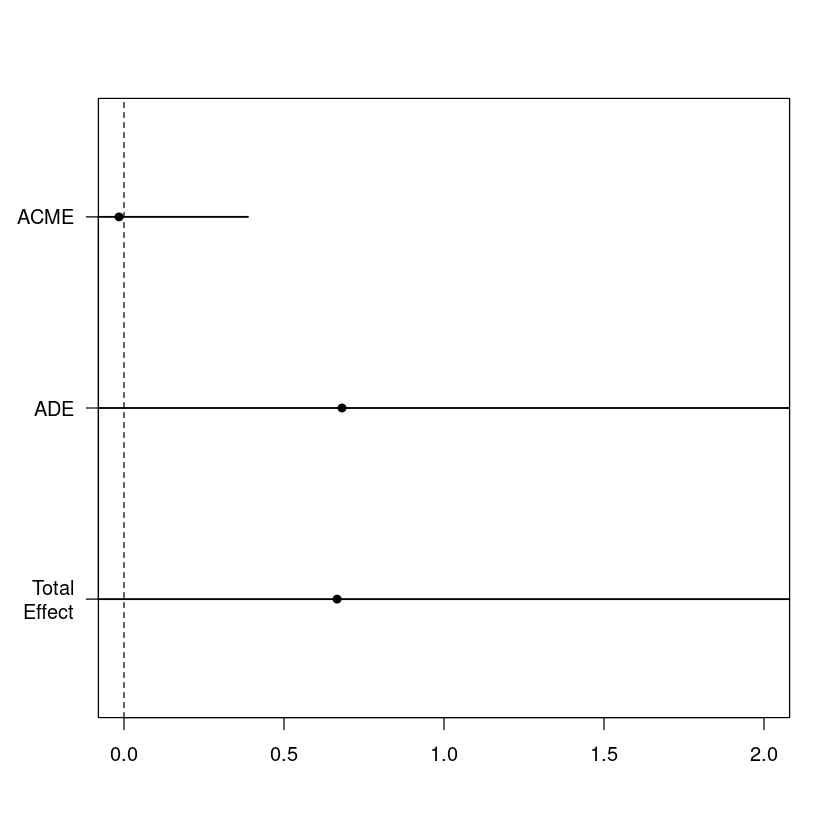

In [65]:
plot(results, xlim=c(0,2))


# Moderated mediation 
Remember we found out in the previous ANOVA analyses that the age group was a moderator for the effect of the experimental treatment. 

We now look into whether the mediation is also moderated by this variable. 


### Model c
Predicting the dependent variable with the condition

NB: this was our model.2 when doing 2-factor ANOVA earlier. In this context we use the default contrasts ("treatment") when building the lm model. 


In [66]:
model.c <- lm(learning_gain ~ condition + studies + condition:studies, data=df)
coef(summary(model.c))


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.2725000,1.043439,1.2195253,0.2443094
conditionPSI,0.3800000,1.475645,0.2575145,0.8008129
studiesHigh School Diploma or Equivalent,0.2941667,1.593879,0.1845602,0.8564220
studiesMaster's Degree,3.7775000,2.333200,1.6190210,0.1294366
conditionPSI:studiesHigh School Diploma or Equivalent,0.5100000,2.254085,0.2262558,0.8245210
conditionPSI:studiesMaster's Degree,-1.9925000,2.760680,-0.7217426,0.4832331


### Model a
Predicting the mediator variable with the condition


In [67]:
model.a <- lm(nb_tests ~ condition + studies + 
                          condition:studies, 
                          data=df)
coef(summary(model.a))


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.750000,1.373397,0.5460914,0.59425130
conditionPSI,1.250000,1.942276,0.6435749,0.53104112
studiesHigh School Diploma or Equivalent,2.916667,2.097898,1.3902806,0.18778876
studiesMaster's Degree,8.250000,3.071008,2.6864144,0.01867129
conditionPSI:studiesHigh School Diploma or Equivalent,-1.583333,2.966876,-0.5336703,0.60257557
conditionPSI:studiesMaster's Degree,-7.250000,3.633666,-1.9952304,0.06741348


### Model c.dash
Same as model c but we add the mediator (solutions).


In [68]:
model.c.dash <- lm(learning_gain ~ condition + 
                            studies + # moderator 
                            nb_tests + # mediation
                            nb_tests:studies + # moderation of the mediator
                            condition:studies, # moderation of the contidion
                data=df)
coef(summary(model.c.dash))


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.5123529,1.1418379,1.32449005,0.21481169
conditionPSI,0.7797549,1.6612335,0.46938307,0.64886289
studiesHigh School Diploma or Equivalent,-0.7654836,1.9973712,-0.38324553,0.70955884
studiesMaster's Degree,7.9151471,3.9636745,1.99692158,0.07376541
nb_tests,-0.3198039,0.5896426,-0.54236913,0.59944179
studiesHigh School Diploma or Equivalent:nb_tests,0.5433850,0.6614638,0.82148860,0.43051768
studiesMaster's Degree:nb_tests,-0.1665850,0.6861592,-0.24277889,0.81308379
conditionPSI:studiesHigh School Diploma or Equivalent,0.1847721,2.3926861,0.07722372,0.93996883
conditionPSI:studiesMaster's Degree,-5.3105882,3.5684337,-1.48821265,0.16753574


## With mediate() package


In [69]:
results <- mediate(model.a, # predicts mediator with condition
                   model.c.dash, # predicts learning with condition and solutions
                   treat='condition', 
                   mediator='nb_tests',
                   boot=TRUE, sims=100, # run bootstrapping procedure
                   control.value = "IPS", 
                   treat.value = "PSI")


Running nonparametric bootstrap


Warning message in predict.lm(new.fit.M, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.t):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.M, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful c

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor studies has new levels Master's Degree


The results indicate a **partial** mediation (ACME **and** ADE are significant).


In [70]:
summary(results)



Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value
ACME            -0.0155      -0.7756         0.39    0.72
ADE              0.6814      -0.8280         2.96    0.46
Total Effect     0.6659      -0.9396         2.56    0.54
Prop. Mediated  -0.0233      -3.7005         3.69    0.86

Sample Size Used: 19 


Simulations: 100 


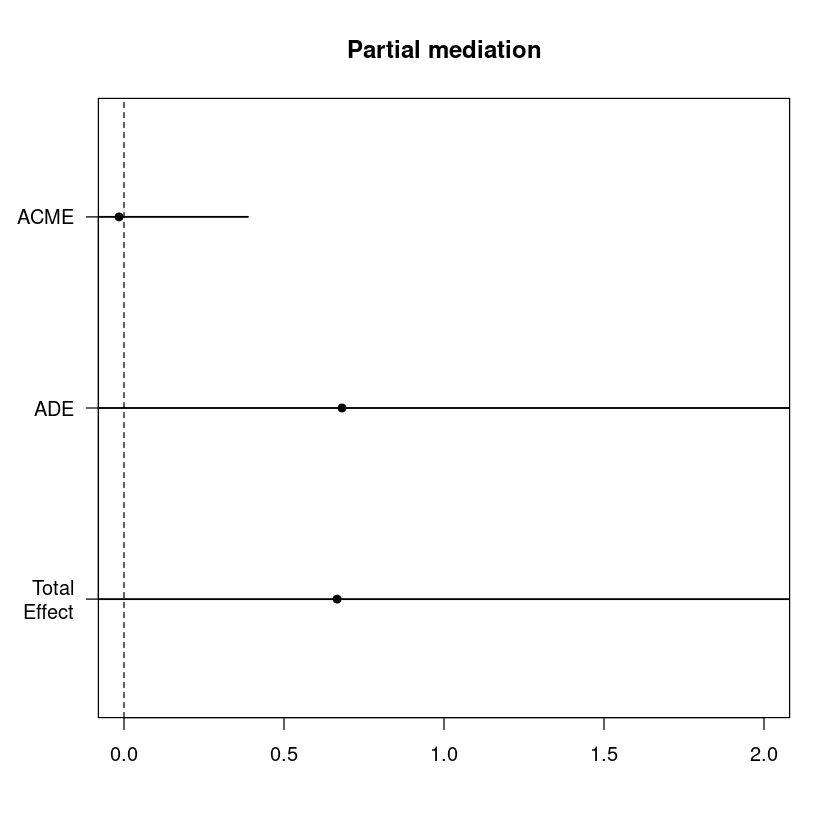

In [71]:
plot(results, main="Partial mediation", xlim=c(0,2))


# Moderated mediation with age group

* It appears that kids have created less solutions than students and professionals.
* It appears that the relation between solutions and learning is different for different age groups.

Does the mediation exist for all age groups ?


## kids have created less solutions than students and professionals


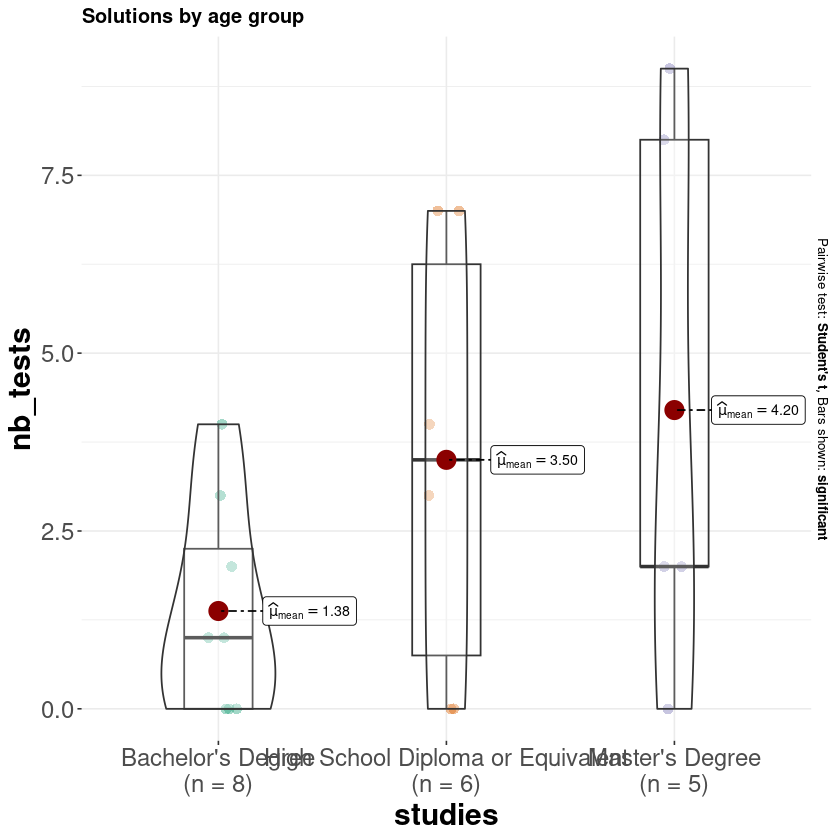

In [72]:
ggbetweenstats(data = df, 
                            x = studies, 
                            y = nb_tests,
                            pairwise.comparisons = FALSE, 
                            results.subtitle=FALSE,
                            var.equal = TRUE,
                            outlier.tagging = FALSE, 
                            plot.type = "box", 
                            title = "Solutions by age group", 
                            ggplot.component = list(theme(text = element_text(size = 18)))) 

## the relation between solutions and learning is different for different age groups


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


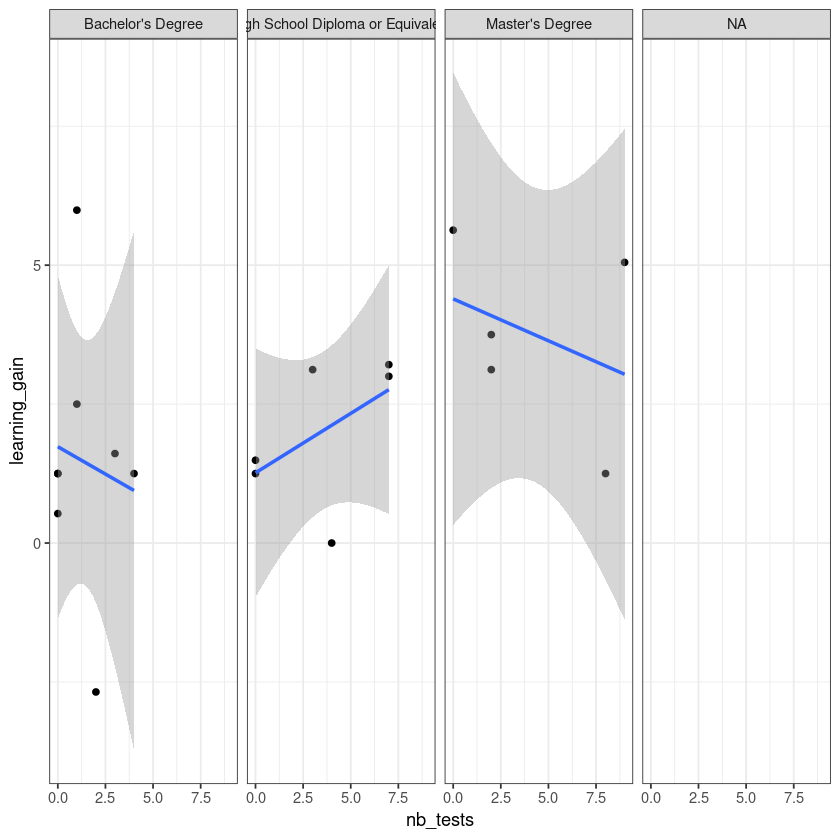

In [74]:
df %>% ggplot(aes(x=nb_tests, y=learning_gain)) +
  geom_point() +
  geom_smooth(method="lm") +
  facet_grid(.~studies) +
  theme_bw() 


# Adding covariates to the mediate function

Approach: We compute the mediation for each age subgroup. This is done by adding a covariates argument to the mediate function. 


In [76]:
results.kids <- mediate(model.a, model.c.dash, treat='condition', mediator='nb_tests', boot=TRUE,sims=100, control.value = "IPS", treat.value = "PSI",
                   covariates = list(studies="High School Diploma or Equivalent"))
summary(results.kids)

Running nonparametric bootstrap


Warning message in predict.lm(new.fit.M, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.t):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.t):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful c


Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

(Inference Conditional on the Covariate Values Specified in `covariates')

               Estimate 95% CI Lower 95% CI Upper p-value
ACME            -0.0745      -3.5920         1.43    0.80
ADE              0.9645      -1.2712         4.19    0.46
Total Effect     0.8900      -1.3367         3.04    0.48
Prop. Mediated  -0.0837      -1.8792         3.09    0.92

Sample Size Used: 19 


Simulations: 100 


In [77]:
results.students <-mediate(model.a, model.c.dash, treat='condition', mediator='nb_tests', boot=TRUE,sims=100, control.value = "IPS", treat.value = "PSI",
                   covariates = list(studies="Bachelor's Degree"))
summary(results.students)

Running nonparametric bootstrap


Warning message in predict.lm(new.fit.M, type = "response", newdata = pred.data.t):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.M, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.t):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.t):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful c


Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

(Inference Conditional on the Covariate Values Specified in `covariates')

               Estimate 95% CI Lower 95% CI Upper p-value
ACME              -0.40        -6.41         6.64    0.64
ADE                0.78        -7.63         6.72    0.68
Total Effect       0.38        -4.35         3.34    0.74
Prop. Mediated    -1.05        -4.08        11.72    0.54

Sample Size Used: 19 


Simulations: 100 


In [78]:
results.professionals <- mediate(model.a, model.c.dash, treat='condition', mediator='nb_tests', boot=TRUE,sims=100, control.value = "IPS", treat.value = "PSI",
                   covariates = list(studies="Master's Degree"))
summary(results.professionals)

Running nonparametric bootstrap


Warning message in predict.lm(new.fit.M, type = "response", newdata = pred.data.t):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.M, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.t):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.t):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(new.fit.Y, type = "response", newdata = pred.data.c):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful c


Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

(Inference Conditional on the Covariate Values Specified in `covariates')

               Estimate 95% CI Lower 95% CI Upper p-value
ACME               2.92        -3.66         8.28    0.74
ADE               -4.53        -9.30         3.48    0.60
Total Effect      -1.61        -3.98         3.13    0.40
Prop. Mediated    -1.81       -31.31         5.81    0.50

Sample Size Used: 19 


Simulations: 100 


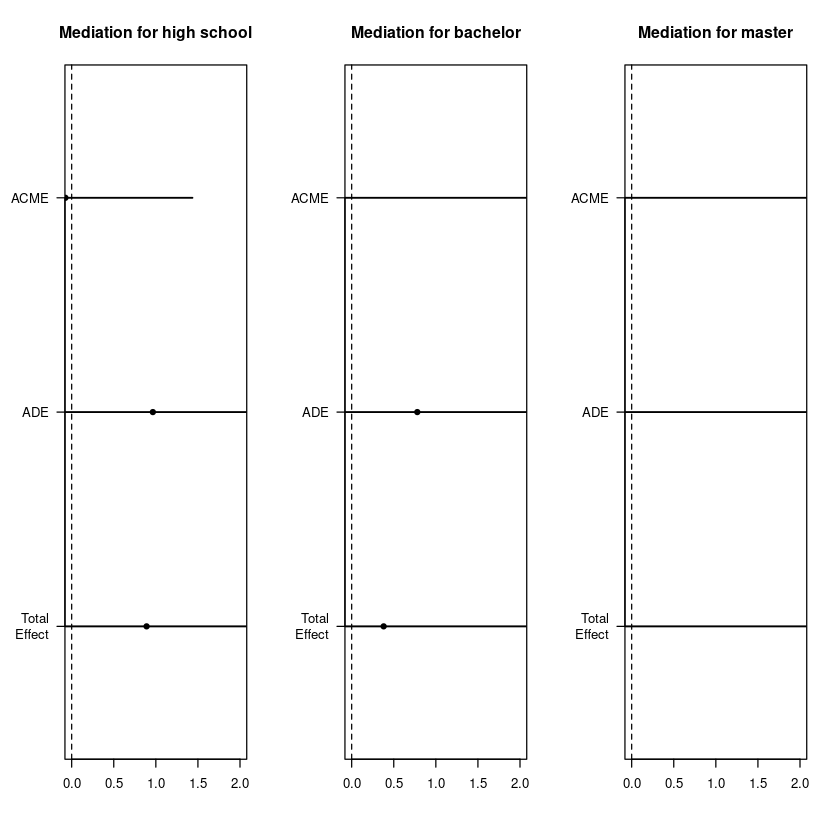

In [79]:
par(mfrow=c(1,3))
plot(results.kids, xlim=c(0,2), main="Mediation for high school")
plot(results.students, xlim=c(0,2), main="Mediation for bachelor")
plot(results.professionals, xlim=c(0,2), main="Mediation for master")
par(mfrow=c(1,1))

# Pushing the envelope ...

Testing whether the direct and indirect effects are different across groups ?

In [80]:
test.modmed(results, 
            covariates.1 = list(age.group = "kids"),
            covariates.2 = list(age.group = "students"), sims = 100)

Running nonparametric bootstrap




ERROR: Error in `[.data.frame`(pred.data.t, , vl): undefined columns selected


In [81]:
test.modmed(results, 
            covariates.1 = list(age.group = "kids"),
            covariates.2 = list(age.group = "professionals"), sims = 100)

Running nonparametric bootstrap




ERROR: Error in `[.data.frame`(pred.data.t, , vl): undefined columns selected


In [ ]:
test.modmed(results, 
            covariates.1 = list(age.group = "students"),
            covariates.2 = list(age.group = "professionals"), sims = 100)

# Role of a pre-treatment moderator ?

We now look at the potential influence of a pre-treatment confounder, the `self.regulation` skills of the participants. 

We wonder whether the potential positive effect of testing many solutions is conditioned on the level of self-regulation skills. The rationale for this could be: when you run experiments (generate many `solutions`), you learn more if you can accurately revise your hypotheses (`self-regulation`) about the phenomenon. This would mean that the moderation effect that we discovered for the number of solutions would be present mainyl for subjects with a high level of self-regulation skills.

The analysis we conduct is similar to the one we did for `age.group` except that this time, the moderator is a continuous variable.


In [ ]:
model.a2 <- lm(nb_tests ~ condition + condition:self.regulation + self.regulation, data=df)
model.c2.dash <- lm(learning ~ condition + self.regulation + condition:self.regulation + solutions + self.regulation, data=df)

In [45]:
results.self.regulation <- mediate(model.a2, model.c2.dash, 
                                   treat='condition', 
                                   mediator='nb_tests', 
                                   boot=TRUE,sims=100, 
                                   control.value = "IPS", treat.value = "PSI")

summary(results.self.regulation)


ERROR: Error in eval(expr, envir, enclos): object 'model.c2.dash' not found


In [ ]:
results.hi.self.regulation <- mediate(model.a2, model.c2.dash, treat='condition', mediator='solutions', 
                                      boot=TRUE,sims=500, control.value = "IPS", treat.value = "PSI",
                   covariates = list(self.regulation=quantile(df$self.regulation, .75)))

summary(results.hi.self.regulation)


In [ ]:
results.lo.self.regulation <- mediate(model.a2, model.c2.dash, treat='condition', mediator='solutions',
                                      boot=TRUE,sims=500, control.value = "IPS", treat.value = "PSI",
                   covariates = list(self.regulation=quantile(df$self.regulation, .25)))

summary(results.lo.self.regulation)

In [ ]:
par(mfrow=c(1,2))
plot(results.lo.self.regulation, main="Low self-regulation", xlim=c(0,2))
plot(results.hi.self.regulation, main="High self-regulation", xlim=c(0,2))
par(mfrow=c(1,1))


In [ ]:
test.modmed(results.self.regulation, 
            covariates.1 = list(self.regulation=quantile(df$self.regulation, .25)),
            covariates.2 = list(self.regulation=quantile(df$self.regulation, .75)), sims = 500)
